#University of Bern: Module 3 Neural Network Project

## 1. Introduction

### **Aim:** 


Classification of MRI images into four classes, including three different types of tumors and no tumor. For this we will construct a deep neural network with fully connected layers and compare it with a CNN as an asset of Deep Learning and to examine the tumor position(segmentation).

> dataset: https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

> github repository: https://github.com/sartajbhuvaji/brain-tumor-classification-dataset


### **Background:**

A brain tumor is a heavy disease among children and adults. Every year, around 11,700 people are diagnosed with a brain tumor (https://www.thebraintumourcharity.org/brain-tumour-signs-symptoms). The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and 36 percent for women (https://www.cancer.net/cancer-types/brain-tumor/statistics). The most prevalent brain tumors are intracranial metastases from systemic cancers, meningiomas, gliomas and pituitary tumors (McFaline-Figueroa and Lee, 2018). Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties. Application of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

Brain Tumors are complex and the diagnosis is challenging due to abnormalities occuring in the sizes and location of brain tumors. Especially in developing countries, the lack of skillful doctors and MRI-Physicans and, the lack of expert knowledge about tumors leads to the difficulties in the generation of reports from MRI. Hence, an automated system on a Cloud could substantially contribute to a solution of this problem.                                          

#### *Acknowledgements for Dataset:*

Navoneel Chakrabarty Swati Kanchan

Chandrabhaga Clinic and Nursing Home

## 2. Brain Tumor Classification (MRI)

In [23]:
## Data Preparation 
# -------->> RUN ONLY ONCE <<-----------

%%capture
!wget https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/master.zip;  # download the dataset
!unzip master.zip && rm master.zip; # unzip the dataset and delete the zip

In [24]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import PIL
import random

import sys
from tqdm import tqdm
import IPython.display as ipyd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

### Meningioma 
Meningioma, is a slow-growing tumor that forms from the meninges, the membranous layers surrounding the brain and spinal cord. It is the most common type of tumor that forms in the head.

Most meningiomas grow very slowly, often over many years without causing symptoms. Therefore, they do not always require immediate treatment and may be monitored over time. But sometimes, their effects on nearby brain tissue, nerves or vessels may cause serious disability.

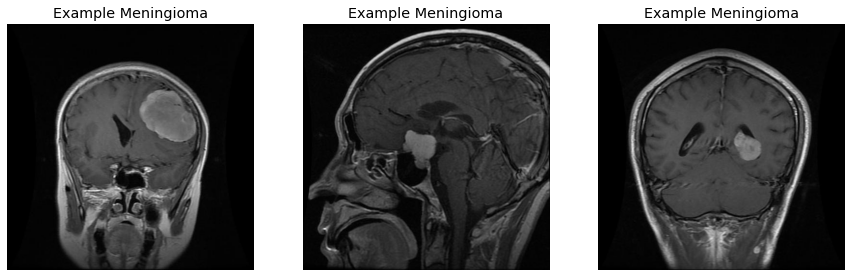

In [45]:
 # defines size for three random pictures
plt.rcParams["figure.figsize"] = (5*3,5*3)

train_meningioma = '/content/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor/'
test_meningioma = '/content/Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/'

# take randomly three images out of each directory
os.chdir(train_meningioma)
filesM = random.sample(os.listdir(train_meningioma),3) 

# plot the three randomly chosen images
for num, x in enumerate(filesM):
    img = PIL.Image.open(x)
    plt.subplot(1,3,num+1)
    plt.title('Example Meningioma')
    plt.axis('off')
    plt.imshow(img)

### Glioma
A glioma is a type of tumor that starts in the glial cells of the brain or the spine. Gliomas comprise about 30 percent of all brain tumors and central nervous system tumours, and 80 percent of all malignant brain tumours. Prognosis of gliomas is given in relation to what grade (as scored by the World Health Organization system) of tumour the patient presents with. Typically, any tumour presenting as above WHO grade I (i.e. a malignant tumour as opposed to a benign tumour) will have a prognosis resulting in eventual death, varying from years (WHO grade II/III) to months (WHO grade IV).

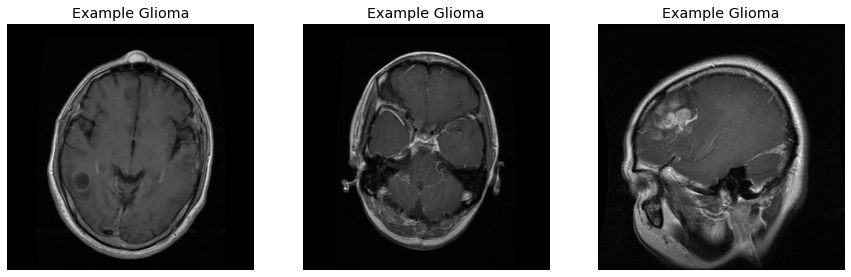

In [47]:
# plot the three randomly chosen images
train_glioma = '/content/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor/'
test_glioma = '/content/Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/'

os.chdir(train_glioma)
filesG = random.sample(os.listdir(train_glioma),3)

for num, x in enumerate(filesG):
    img = PIL.Image.open(x)
    plt.subplot(1,3,num+1)
    plt.title('Example Glioma')
    plt.axis('off')
    plt.imshow(img)

### Pituitary Tumor
Pituitary adenomas are tumors that occur in the pituitary gland. The pituitary gland is responsible for the secretion of hormons which control a large amount of vital physical functions and processes. Tumors at pituitary gland may influene the hormone production. 

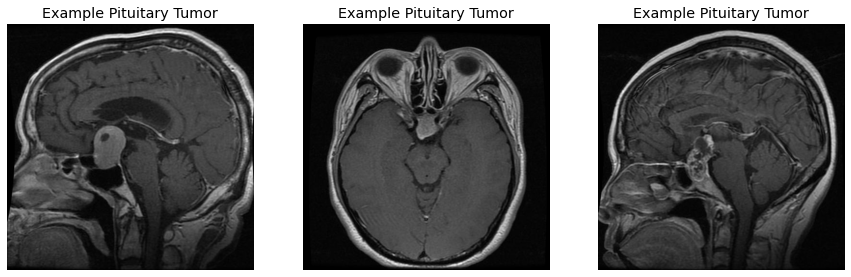

In [49]:
train_pituitary = '/content/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor'
test_pituitary = '/content/Brain-Tumor-Classification-DataSet-master/Testing/pituitary_tumor'

os.chdir(train_pituitary)
filesG = random.sample(os.listdir(train_pituitary),3)

for num, x in enumerate(filesG):
    img = PIL.Image.open(x)
    plt.subplot(1,3,num+1)
    plt.title('Example Pituitary Tumor')
    plt.axis('off')
    plt.imshow(img)


### No Tumor
In the following are some examples of MRI images without any tumor.


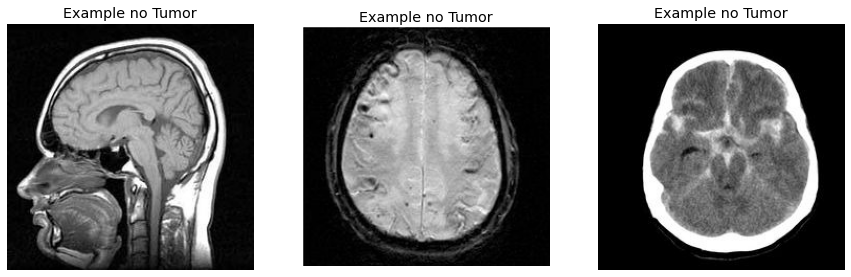

In [51]:
train_no_tumor = '/content/Brain-Tumor-Classification-DataSet-master/Training/no_tumor/'
test_no_tumor = '/content/Brain-Tumor-Classification-DataSet-master/Testing/no_tumor/'

os.chdir(train_no_tumor)
filesNT =random.sample(os.listdir(train_no_tumor),3)

for num, x in enumerate(filesNT):
    img = PIL.Image.open(x)
    plt.subplot(1,3,num+1)
    plt.title('Example no Tumor')
    plt.axis('off')
    plt.imshow(img)

## 3. Fully-Connected Neural Network
In this section we will create a fully-connected neural network to perform brain tumor recognition and classification using TensorFlow 1. 

**A brief reminder:**
A fully connected neural network consists of a series of fully connected layers that connect every neuron in one layer to every neuron in the other layer.

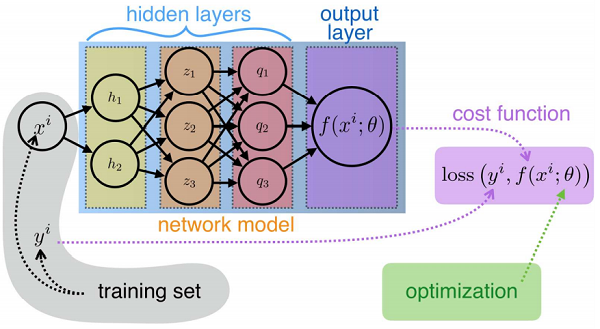


Image Source: Bern Winter School 2021

In [52]:
colab = True # set to True is using google colab

In [53]:
if colab:
    %tensorflow_version 2.x

In [9]:
#Feeding Training Data to X_train and y_train

X_train = [] # empty list for appending images 
y_train = [] # and labels

for i in tqdm(os.listdir(train_glioma)):
    path = os.path.join(train_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224)) # this defines the size of the images
    X_train.append(img)
    y_train.append('Glioma')
    
for i in tqdm(os.listdir(train_meningioma)):
    path = os.path.join(train_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Meningioma')

for i in tqdm(os.listdir(train_pituitary)): #pitituary
    path = os.path.join(train_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Pituitary') 
    
for i in tqdm(os.listdir(train_no_tumor)):
    path = os.path.join(train_no_tumor,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('No_Tumor')   

100%|██████████| 395/395 [00:01<00:00, 347.66it/s]


In [10]:
#Feeding Testing Data to X_train and y_train

X_test = []
y_test = []

for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Glioma')
    
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Meningioma')

for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Pituitary')      

for i in tqdm(os.listdir(test_no_tumor)):
    path = os.path.join(test_no_tumor,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('No_Tumour') 

100%|██████████| 105/105 [00:00<00:00, 745.10it/s]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


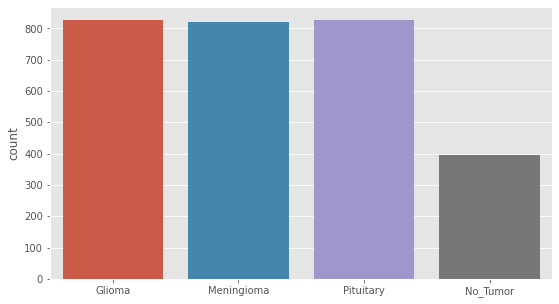

In [11]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


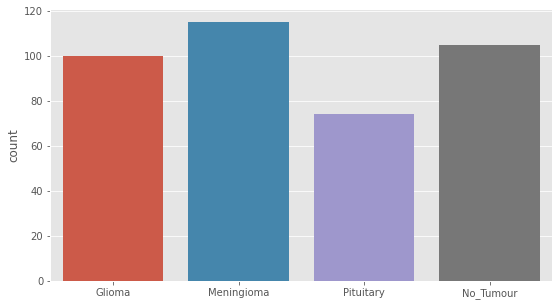

In [12]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_test)
plt.show()

In [13]:
# converts lists into an array
X_train = np.array(X_train) 
y_train = np.array(y_train)
X_train.shape,y_train.shape

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape,y_test.shape

# normalization of the images
X_train_2d = X_train/255.0
X_test_2d = X_test/255.0

print ('train: data shape', X_train_2d.shape, 'label shape', y_train.shape)
print ('test: data shape', X_test_2d.shape, 'label shape', y_test.shape)

train: data shape (2870, 224, 224, 3) label shape (2870,)
test: data shape (394, 224, 224, 3) label shape (394,)


In [14]:
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# makes integer labels from categories
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [15]:
y_train

array([0, 0, 0, ..., 2, 2, 2])

In [16]:
# One hot encoding
# 
n_train = X_train_2d.shape[0]
n_test = X_test_2d.shape[0]

X_train = X_train_2d.reshape([n_train, -1])
X_test = X_test_2d.reshape([n_test, -1])

y_train_1_hot = np.zeros((n_train, y_train.max()+1))
y_train_1_hot[np.arange(n_train),y_train] = 1

y_test_1_hot = np.zeros((n_test, y_test.max()+1))
y_test_1_hot[np.arange(n_test), y_test] = 1

one-hot label: [1. 0. 0. 0.] . Actual label: 0


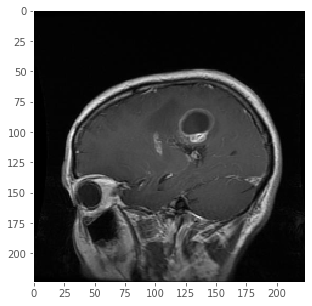

In [17]:
img = X_train_2d[0]
lbl = y_train[0]
lbl_1_hot = y_train_1_hot[0]

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.grid(False)
print('one-hot label:',lbl_1_hot, '. Actual label:', lbl )

In [54]:
def fully_connected_layer(x, n_output, name=None, activation=None):
    """Fully connected layer.

    Parameters
    ----------
    x : tf.Tensor
        Input tensor to connect
    n_output : int
        Number of output neurons
    name : None, optional
        TF Scope to apply
    activation : None, optional
        Non-linear activation function

    Returns
    -------
    h, W : tf.Tensor, tf.Tensor
        Output of the fully connected layer and the weight matrix
    """
    if len(x.get_shape()) != 2:
        x = tf.flatten(x, reuse=None)

    n_input = x.get_shape().as_list()[1]

    with tf.variable_scope(name or "fc", reuse=None):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            dtype=tf.float32,
            initializer=tf.initializers.glorot_uniform())

        b = tf.get_variable(
            name='b',
            shape=[n_output],
            dtype=tf.float32,
            initializer=tf.initializers.constant(0.0))

        h = tf.nn.bias_add(
            name='h',
            value=tf.matmul(x, W),
            bias=b)

        if activation:
            h = activation(h)

        return h, W

In [55]:
# calculates the number of inputs and outputs
n_input = X_train.shape[1]
n_output = y_train_1_hot.shape[1]

In [56]:
import sys
import shutil

import IPython.display as ipyd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')


In [21]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_input]) # input layer
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output]) # output layser
    
    # 5 layer: 150528 inputs -> 4 outputs (224*224*3)
    # no (i.e. linear) activation
    L1, W1 = fully_connected_layer(X , 1500, 'L1', activation=tf.nn.relu)   #3. first layer: takes X as input, 1500, relu
    L2, W2 = fully_connected_layer(L1 , 512, 'L2', activation=tf.nn.relu)
    L3, W3 = fully_connected_layer(L2 , 256, 'L3', activation=tf.nn.relu)
    L4, W4 = fully_connected_layer(L3, 64, 'L4', activation=tf.nn.relu)
    L5, W5 = fully_connected_layer(L4, 4, 'L5') #4. last layer, 4 neurons, NO ACTIVATION HERE
    # softmax activation
    Y_onehot = tf.nn.softmax(L5, name='Logits')
    
    # prediction: onehot->integer
    Y_pred = tf.argmax(Y_onehot, axis=1, name='YPred')
    
    # cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(Y_onehot), reduction_indices=[1]))
    # here we use numerically stable implementation of the same:
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=L5, labels=Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cross_entropy)
    
    # get fraction of correctly assigned labels
    Y_true = tf.argmax(Y, 1)
    Correct = tf.equal(Y_true, Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')

0.52125436 0.23350254
0.702439 0.4314721
0.7296167 0.4822335
0.7226481 0.43654823
0.83902436 0.52538073
0.83728224 0.53045684
0.9013937 0.5837563
0.83554006 0.56852794
0.88013935 0.5406091
0.90696865 0.5888325
0.95400697 0.6827411
0.93867594 0.677665
0.97874564 0.6928934
0.9627178 0.6497462
0.94459933 0.5913706


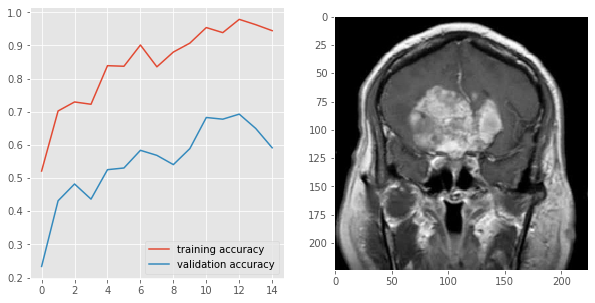

found label: 3 true label: 0


In [22]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 64
    n_epochs = 15

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            X_batch, y_batch = X_train[sub_idx], y_train_1_hot[sub_idx]

            sess.run(optimizer, feed_dict={
                X: X_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: X_test,
                             Y: y_test_1_hot
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: X_train,
                             Y: y_train_1_hot
                             })
        print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)

    # final test accuracy:
    corr, accr = sess.run((Correct, Accuracy),
                          feed_dict={
                              X: X_test,
                              Y: y_test_1_hot
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0]
    wrong0_lbl, L1_res, L2_res, L3_res = sess.run([Y_pred, L1, L2, L3],
                   feed_dict={
                       X: X_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test_1_hot[wrong_idx0:wrong_idx0+1]
                   })
    wrong0_lbl, L1_res, L2_res, L3_res = wrong0_lbl[0], L1_res[0], L2_res[0], L3_res[0]
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].imshow(X_test_2d[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

The learned model parameters are stored in a matrix W1. The matrix contains all of the weights showing importance of each input pixel (150528) for each of the 1500 outputs.

In [ ]:
print(W1_res.shape)

(150528, 1500)


Let's visualize the trained weights:



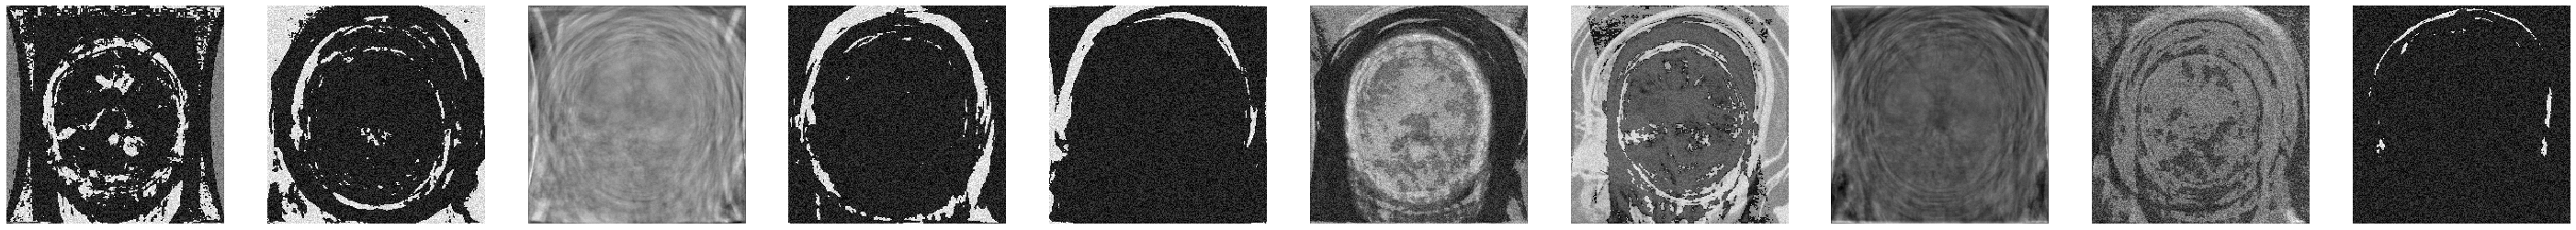

In [44]:
W1_res = W1_res.reshape(224,224,3,1500)
_, axs = plt.subplots(1, 10, figsize=(50,30))
for i in range(10):
    axs[i].imshow(W1_res[..., 0, i], cmap='gray', interpolation='nearest')
    axs[i].grid(False)
    axs[i].axis('off')